In [3]:
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm


#####################################################################################
 _______            ______  ________  ____    ____  ____    ____  ________   ______    
|_   __ \         .' ___  ||_   __  ||_   \  /   _||_   \  /   _||_   __  |.' ____  \   
  | |__) |_   __ / .'   \_|  | |_ \_|  |   \/   |    |   \/   |    | |_ \_|| (___ \_|  
  |  ___/[ \ [  ]| |   ____  |  _| _   | |\  /| |    | |\  /| |    |  _| _  _.____`.   
 _| |_    \ '/ / \ `.___]  |_| |__/ | _| |_\/_| |_  _| |_\/_| |_  _| |__/ || \____) |  
|_____| [\_:  /   `._____.'|________||_____||_____||_____||_____||________| \______.'  
         \__.'                           
#####################################################################################                                                                                                                                   

Welcome in Pygemmes, a modular library to prototype and study dynamical systems !
This library is oriented toward generation

## CREATING A MODEL THROUGH AN INTERFACE


In [6]:
AllModels = pgm.get_available_models(returnas=dict)

Override differential variable a.
 Previous :{'func': <function Funcs.Productivity.<lambda> at 0x000001D855166200>, 'com': 'ODE exogenous, exponential'} 
 by       :{'func': <function <lambda> at 0x000001D817E22B60>, 'com': 'Labor Productivity depends on investment'}


omega employment employment 0 local


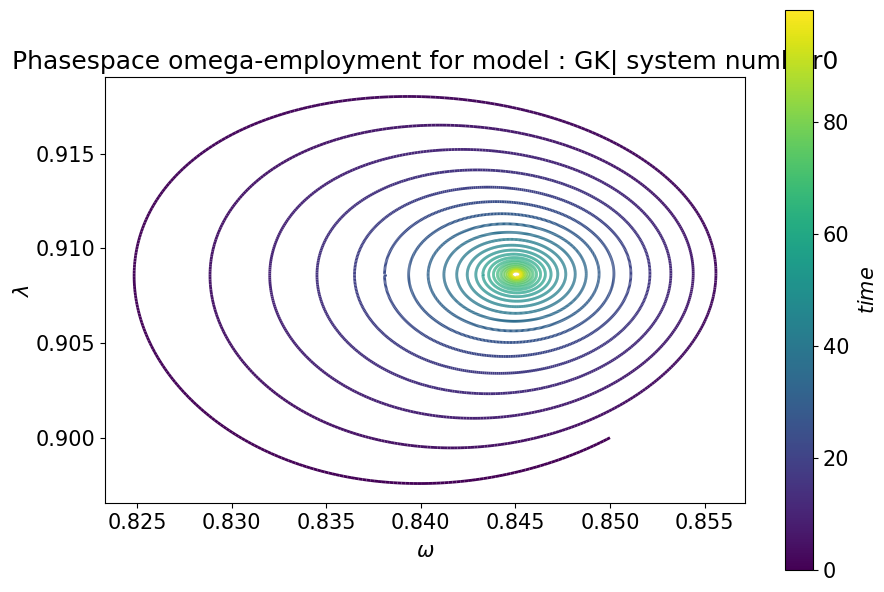

In [104]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import numpy as np
style = {'description_width': 'initial'}

default = 'GK'

#hub=pgm.Hub('GK',verb=False)
#hub.run()
#### ALL BUTTONS 


# TAB "Show All Models" ################################
ShowModels = widgets.Button(description='Show All Models')
def ShowModel_event(obj):
    display(pgm.get_available_models())
ShowModels.on_click(ShowModel_event)

ShowFields = widgets.Button(description='Show All Fields')
def ShowFields_event(obj):
    display(pgm.get_available_fields())
ShowFields.on_click(ShowFields_event)

ShowPlots = widgets.Button(description='Show All Plots')
def ShowPlots_event(obj):
    display(pgm.get_available_plots())
ShowPlots.on_click(ShowPlots_event)
show_widgets= widgets.HBox([ShowModels,ShowFields,ShowPlots])

# TAB "Load model" #######################################
dropdown = widgets.Dropdown(options=list(AllModels.keys()),value=default,description='Model file :')
presets = widgets.Dropdown(options=[None]+AllModels[default]['presets'], description='Preset :')
def valuechange(change):
    presets.options = [None]+AllModels[change['new']]['presets']
dropdown.observe(valuechange, names='value')

# Verbatim 
verbatim = widgets.Dropdown(options=[True,False],value=True,description='Verbose')

# Create the hub
createhub = widgets.Button(description='LOAD !')
def createhub_event(obj):
    hub= pgm.Hub(dropdown.value,preset=presets.value,verb=verbatim.value)
    #return hub
createhub.on_click(createhub_event)

# Verbatim checkbox 
input_widgets= widgets.HBox([dropdown,presets,verbatim,createhub])

# TAB "execute" #########################################

### CHANGE VARIABLE 
# Choose variable
if hub is not None: 
    Allvars = list(set(hub.dmisc['dfunc_order']['parameter']
                    +hub.dmisc['dfunc_order']['parameters']
                    +hub.dmisc['dfunc_order']['differential'])
                    -set(['__ONE__','dt']))
else :
    Allvars=['']
vardrop = widgets.Dropdown(options=Allvars,value=Allvars[0],description='Field to change :')

# Choose value
setvalue =  widgets.FloatText(
    value=0,
    description='Set value:')

#  Set  
clickset = widgets.Button(description='Set !')
def clickset_event(obj):
    hub.set_dparam(vardrop.value,float(setvalue.value))
clickset.on_click(clickset_event)

run_widgets_0 = widgets.HBox([vardrop,setvalue,clickset])

### RUN 
clickrun = widgets.Button(description='RUN!')
def clickrun_event(obj):
    hub.run()
clickrun.on_click(clickset_event)
run_widgets_1 = widgets.HBox([clickrun])


### REINTERPOLATE 
# Choose value
setReinterp =  widgets.FloatText(
    value=100,
    description='Number of temporal points:')

#  Set  
clickset = widgets.Button(description='Set !')
def clickset_event(obj):
    hub.reinterpolate_dparam(setReinterp.value)
clickset.on_click(clickset_event)

run_widgets_2 = widgets.HBox([setReinterp,clickset])

run_widgets = widgets.VBox([run_widgets_0,run_widgets_1,run_widgets_2])



# TAB "instrospection" ##################################
clicksummary = widgets.Button(description='get summary')
def clicksummary_event(obj):
    hub.get_summary()
clicksummary.on_click(clicksummary_event)



# TAB "plots" ###########################################
R=hub.get_dparam()
t=R['time']['value'][:,0,0,0,0]
TimeSlider = widgets.FloatRangeSlider(
    value=[t[0], t[-1]],
    min=t[0],
    max=t[-1],
    step=t[1]-t[0],
    description='Time range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

Parrallel = widgets.Select(
    options=np.arange(hub.dparam['nx']['value']),
    value=0,
    description='parrallel :',
    disabled=False
)

Region = widgets.Select(
    options=hub.dparam['nr']['list'],
    value=hub.dparam['nr']['list'][0],
    description='Region :',
    disabled=False
) 


Plotvars = hub.dmisc['dfunc_order']['statevar']+hub.dmisc['dfunc_order']['differential']

varXdrop = widgets.Dropdown(options=Plotvars,value='time',description='X axis :')
varYdrop = widgets.Dropdown(options=Plotvars,value='time',description='Y axis :')
varCdrop = widgets.Dropdown(options=Plotvars,value='time',description='color :')
plot_widgets0 = widgets.VBox([TimeSlider,Parrallel,Region])

clickplot = widgets.Button(description='Plot !')
def clickplot_event(obj):
    print(varXdrop.value,
                         varYdrop.value,
                         varYdrop.value,
                         Parrallel.value,
                         Region.value)
    pgm.plots.phasespace(hub,x=varXdrop.value,
                         y=varYdrop.value,
                         color = varCdrop.value,idx=0,Region=0)
clickplot.on_click(clickplot_event)
plot_widgets1 = widgets.HBox([varXdrop,varYdrop,varCdrop,clickplot])

plot_widgets= widgets.VBox([plot_widgets0,plot_widgets1])


# TAB "saveload" ########################################




############################ CREATE THE INTERFACE ################################
##################################################################################

introspect_widgets = widgets.HBox([])
#plot_widgets = widgets.HBox([])
saveload_widgets = widgets.HBox([])

tab = widgets.Tab()
tab.children= [show_widgets,input_widgets,run_widgets,introspect_widgets,plot_widgets]
tab.titles = ['Exploring Pygemmes','Loading model','Execute','Introspection','Plots','Save/Load']


display(tab)



In [90]:
R=hub.get_dparam()
R['nx']

{'value': 1,
 'units': '',
 'definition': 'Number of system in parrallel',
 'group': 'Numerical',
 'com': 'No comment',
 'symbol': '$nx$',
 'multisect': '',
 'size': ['__ONE__', '__ONE__'],
 'inmodel': []}

In [96]:
t

array([ 0., nan, nan, ..., nan, nan, nan])